In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explore the data

### Subtask:
1. Display the first few rows of the DataFrame.
2. Check the data types of each column.
3. Look for any missing values in the dataset.

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
print('\t Data types for each columm')
df.dtypes

	 Data types for each columm


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [73]:
print('\t Columns with missing values')
df.isnull().sum()

	 Columns with missing values


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Analyze the target variable

### Subtask:
1. Examine the distribution of the 'Churn' variable.
2. Visualize the distribution of the 'Churn' variable.

In [74]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


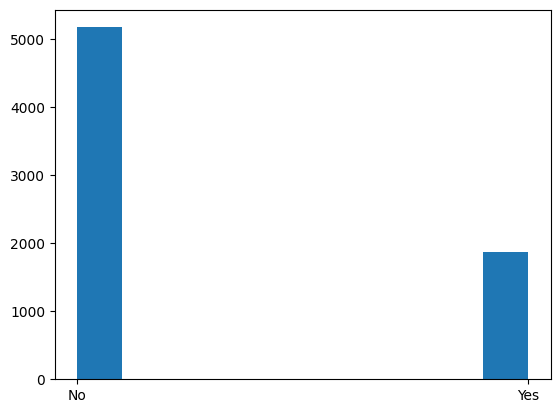

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(df['Churn'])
plt.show()

## Analyze features

### Subtask:
1. Identify different types of features (numerical and categorical).
2. Analyze numerical features: explore their distribution using descriptive statistics and visualizations.
3. Analyze categorical features: explore their distribution and relationship with 'Churn' using value counts and visualizations.

In [76]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

Summary Statistics for numerical columns
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


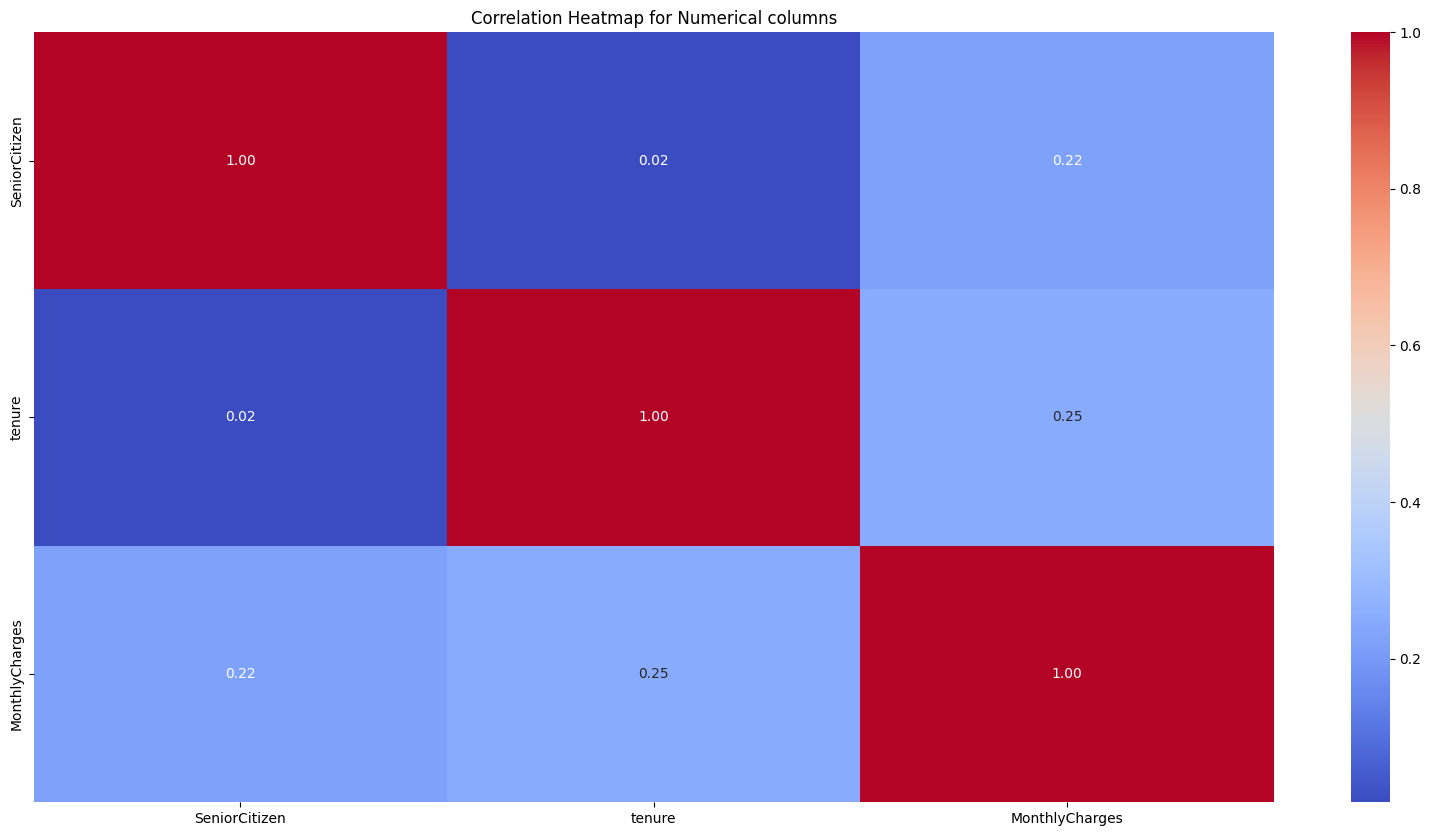

In [77]:
print('Summary Statistics for numerical columns')
print(df[numerical_cols].describe())

plt.figure(figsize=(20, 10))
sns.heatmap(df[numerical_cols].corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical columns')
plt.show()

In [78]:
pip install bioinfokit

Null hypothesis: gender and Churn are independent
Alternative hypothesis: gender and Churn are Dependent

Test result
Observed frequency values 

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

**************************************************

Expected frequency counts

         No     Yes
--  -------  ------
 0  2562.39  925.61
 1  2611.61  943.39

**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.484083   0.486579
Log-likelihood     1      0.484068   0.486586

Visualizing gender and Churn


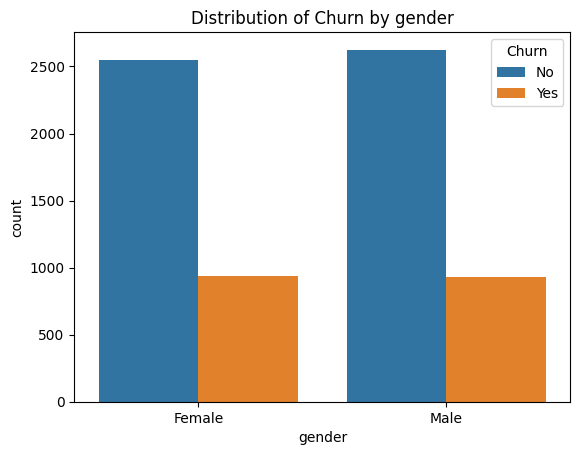

Null hypothesis: Partner and Churn are independent
Alternative hypothesis: Partner and Churn are Dependent

Test result
Observed frequency values 

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2674.79  966.212
 1  2499.21  902.788

**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       158.733  2.13991e-36
Log-likelihood     1       160.64   8.20128e-37

Visualizing Partner and Churn


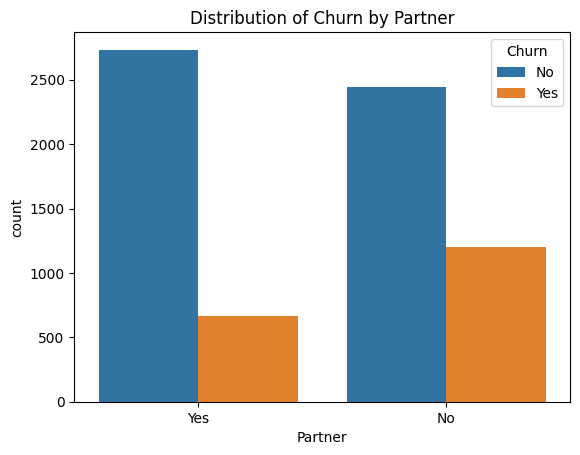

Null hypothesis: Dependents and Churn are independent
Alternative hypothesis: Dependents and Churn are Dependent

Test result
Observed frequency values 

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  3623.93  1309.07
 1  1550.07   559.93

**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       189.129  4.92492e-43
Log-likelihood     1       202.874  4.92722e-46

Visualizing Dependents and Churn


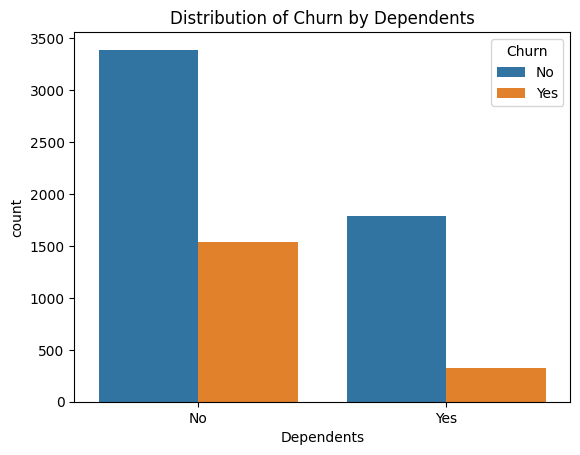

Null hypothesis: PhoneService and Churn are independent
Alternative hypothesis: PhoneService and Churn are Dependent

Test result
Observed frequency values 

Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

**************************************************

Expected frequency counts

          No       Yes
--  --------  --------
 0   501.018   180.982
 1  4672.98   1688.02

**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.915033   0.338783
Log-likelihood     1      0.925475   0.336041

Visualizing PhoneService and Churn


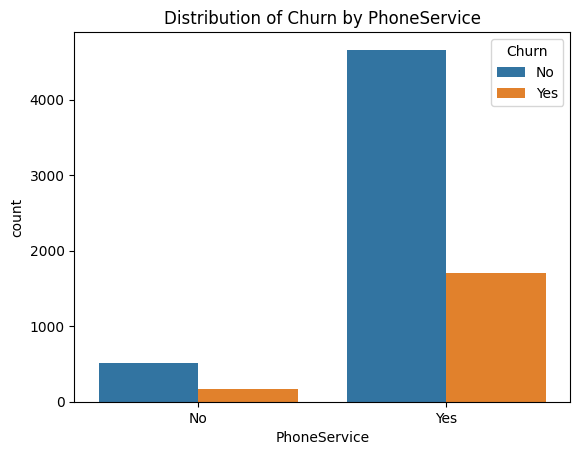

Null hypothesis: MultipleLines and Churn are independent
Alternative hypothesis: MultipleLines and Churn are Dependent

Test result
Observed frequency values 

Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

**************************************************

Expected frequency counts

          No      Yes
--  --------  -------
 0  2490.4    899.604
 1   501.018  180.982
 2  2182.59   788.414

**************************************************

Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.3304  0.00346438
Log-likelihood     2       11.2866  0.00354111

Visualizing MultipleLines and Churn


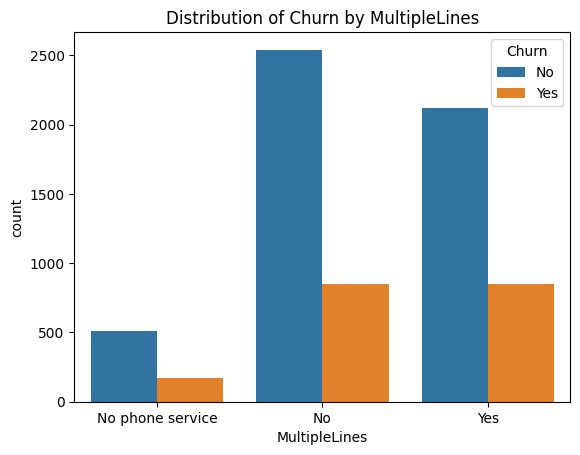

Null hypothesis: InternetService and Churn are independent
Alternative hypothesis: InternetService and Churn are Dependent

Test result
Observed frequency values 

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  1778.54  642.46
 1  2274.41  821.585
 2  1121.05  404.954

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       732.31   9.57179e-160
Log-likelihood     2       782.818  1.03095e-170

Visualizing InternetService and Churn


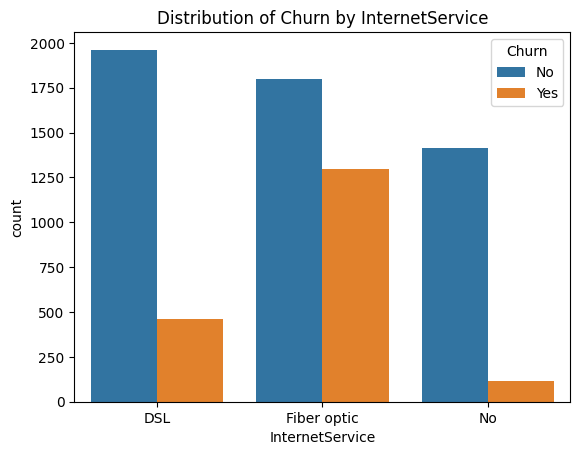

Null hypothesis: OnlineSecurity and Churn are independent
Alternative hypothesis: OnlineSecurity and Churn are Dependent

Test result
Observed frequency values 

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2569.74  928.264
 1  1121.05  404.954
 2  1483.22  535.782

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       849.999  2.66115e-185
Log-likelihood     2       911.044  1.47661e-198

Visualizing OnlineSecurity and Churn


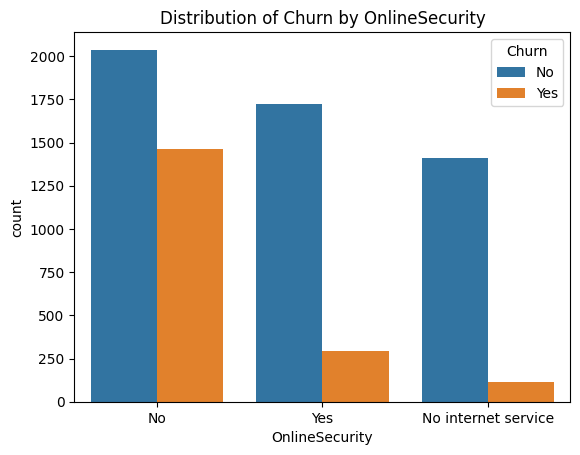

Null hypothesis: OnlineBackup and Churn are independent
Alternative hypothesis: OnlineBackup and Churn are Dependent

Test result
Observed frequency values 

Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2268.54  819.462
 1  1121.05  404.954
 2  1784.42  644.583

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       601.813  2.07976e-131
Log-likelihood     2       659.117  7.49267e-144

Visualizing OnlineBackup and Churn


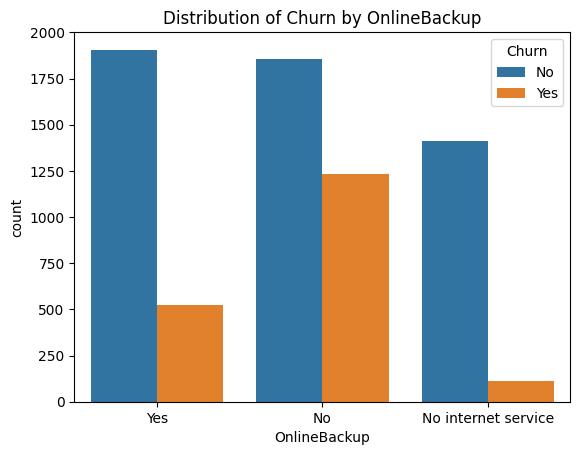

Null hypothesis: DeviceProtection and Churn are independent
Alternative hypothesis: DeviceProtection and Churn are Dependent

Test result
Observed frequency values 

Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2273.68  821.32
 1  1121.05  404.954
 2  1779.27  642.726

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       558.419  5.50522e-122
Log-likelihood     2       618.614  4.67484e-135

Visualizing DeviceProtection and Churn


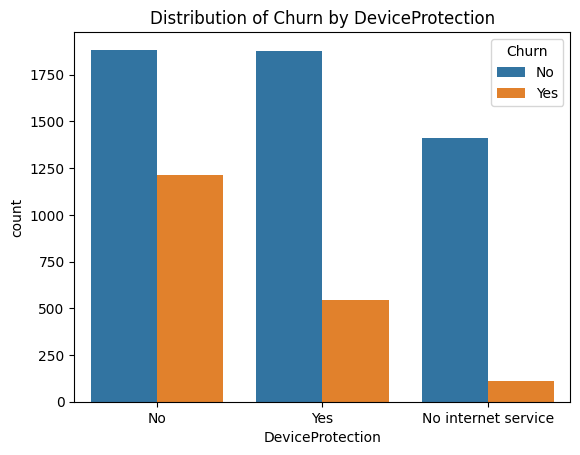

Null hypothesis: TechSupport and Churn are independent
Alternative hypothesis: TechSupport and Churn are Dependent

Test result
Observed frequency values 

Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2551.37  921.63
 1  1121.05  404.954
 2  1501.58  542.416

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       828.197  1.44308e-180
Log-likelihood     2       887.714  1.71904e-193

Visualizing TechSupport and Churn


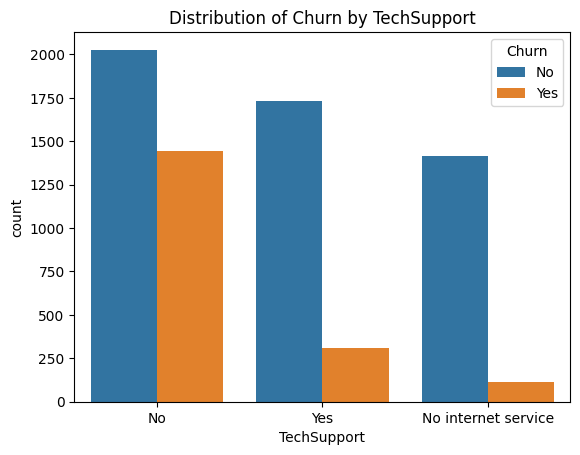

Null hypothesis: StreamingTV and Churn are independent
Alternative hypothesis: StreamingTV and Churn are Dependent

Test result
Observed frequency values 

Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2064.31  745.689
 1  1121.05  404.954
 2  1988.64  718.356

**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       374.204  5.52899e-82
Log-likelihood     2       449.456  2.52305e-98

Visualizing StreamingTV and Churn


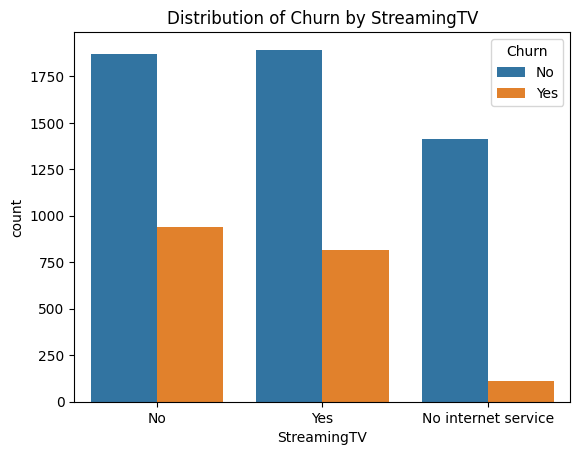

Null hypothesis: StreamingMovies and Churn are independent
Alternative hypothesis: StreamingMovies and Churn are Dependent

Test result
Observed frequency values 

Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  2045.94  739.055
 1  1121.05  404.954
 2  2007.01  724.99

**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       375.661  2.66776e-82
Log-likelihood     2       450.765  1.31082e-98

Visualizing StreamingMovies and Churn


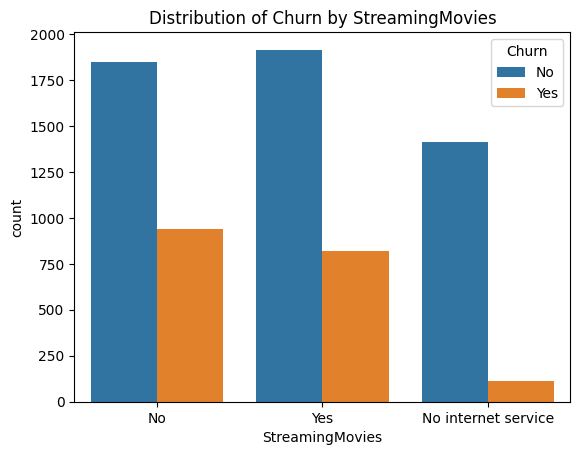

Null hypothesis: Contract and Churn are independent
Alternative hypothesis: Contract and Churn are Dependent

Test result
Observed frequency values 

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

**************************************************

Expected frequency counts

         No       Yes
--  -------  --------
 0  2846.69  1028.31
 1  1082.11   390.89
 2  1245.2    449.802

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       1184.6   5.86304e-258
Log-likelihood     2       1386.81  7.2127e-302

Visualizing Contract and Churn


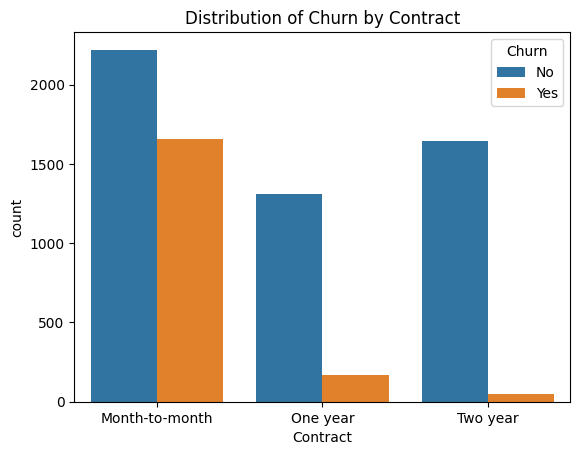

Null hypothesis: PaperlessBilling and Churn are independent
Alternative hypothesis: PaperlessBilling and Churn are Dependent

Test result
Observed frequency values 

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400

**************************************************

Expected frequency counts

         No       Yes
--  -------  --------
 0  2109.86   762.142
 1  3064.14  1106.86

**************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       258.278  4.07335e-58
Log-likelihood     1       269.422  1.51657e-60

Visualizing PaperlessBilling and Churn


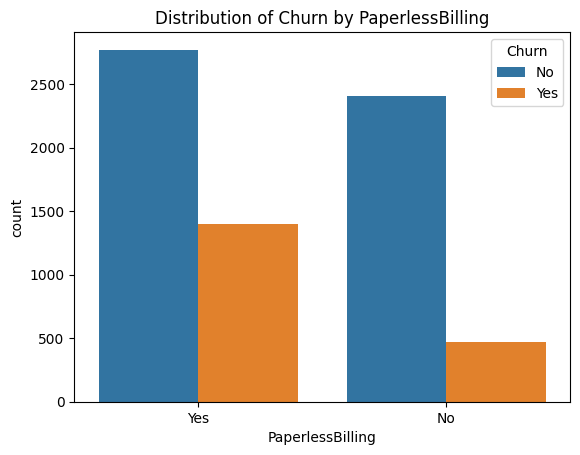

Null hypothesis: PaymentMethod and Churn are independent
Alternative hypothesis: PaymentMethod and Churn are Dependent

Test result
Observed frequency values 

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

**************************************************

Expected frequency counts

         No      Yes
--  -------  -------
 0  1134.27  409.731
 1  1118.11  403.893
 2  1737.4   627.6
 3  1184.22  427.776

**************************************************

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            3       648.142  3.68235e-140
Log-likelihood     3       627.09   1.35033e-135

Visualizing PaymentMethod and Churn


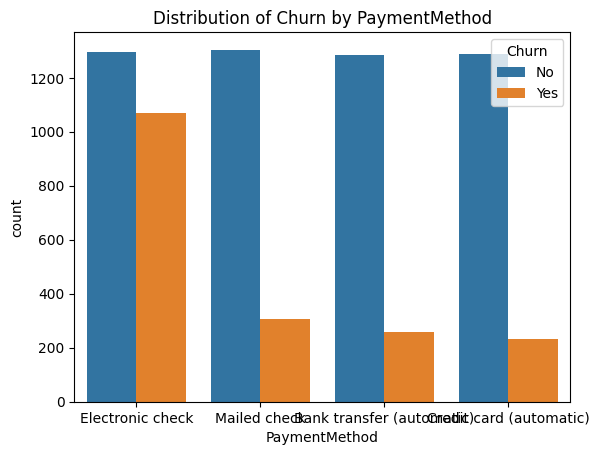

Null hypothesis: Churn and Churn are independent
Alternative hypothesis: Churn and Churn are Dependent

Test result
Observed frequency values 

Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869

**************************************************

Expected frequency counts

         No       Yes
--  -------  --------
 0  3800.98  1373.02
 1  1373.02   495.976

**************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       7037.87          0
Log-likelihood     1       8130.68          0

Visualizing Churn and Churn


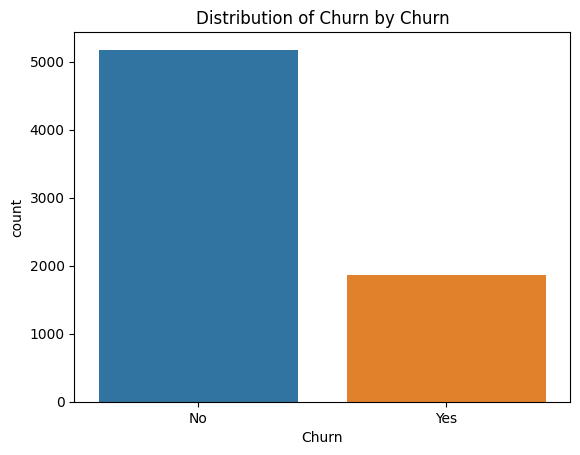

In [79]:
from bioinfokit.analys import stat
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def test_associtation(df, x,y):
  table = pd.crosstab(df[x], df[y])
  test = stat()
  test.chisq(df= table)

  print('Null hypothesis: {} and {} are independent'.format(x,y))
  print('Alternative hypothesis: {} and {} are Dependent\n'.format(x,y))
  print('Test result')
  print('='*50)
  print('Observed frequency values \n')
  print(table)
  print()
  print('*' * 50)
  print(test.expected_df)
  print('*' * 50)
  print(test.summary)
  print('Visualizing {} and {}'.format(x,y))
  sns.countplot(x=x, hue=y, data=df)
  plt.title(f'Distribution of Churn by {x}')
  plt.show()


categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'customerID' from categorical columns for association test
categorical_cols = categorical_cols.drop('customerID', errors='ignore')

for col in categorical_cols:
  if col == 'TotalCharges':
    continue
  test_associtation(df, col, 'Churn')

## Handle missing values

### Subtask:
1. Re-check for missing values in the DataFrame.
2. If any missing values are found, decide on an appropriate strategy to handle them.
3. Implement the chosen strategy to handle the missing values.

In [80]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [81]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [82]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [83]:
df = df.dropna()

In [84]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Handle missing values

### Subtask:
1. Drop rows with missing values.
2. Verify that there are no more missing values in the DataFrame.

In [86]:
df = df.dropna()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Preprocess the data

### Subtask:
1. Encode categorical variables.

In [88]:
print(categorical_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [89]:
df1 = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first = True)

### Subtask:
2. Scale numerical features.

In [90]:
df1.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select the numerical columns
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df1[numerical_cols]

# Fit the scaler on the numerical data and transform it
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Assign the scaled data back to the DataFrame
df1[numerical_cols] = scaled_numerical_data

In [92]:
# The customerID column was already handled during one-hot encoding, so this line is not needed.
# df1 = df1.drop('customerID')

In [93]:
df1.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [94]:
df2 = df1[[ 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes']]

In [95]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.440327,-1.280248,-1.161694,-0.994194,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,-0.440327,0.064303,-0.260878,-0.173740,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-0.440327,-1.239504,-0.363923,-0.959649,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,-0.440327,0.512486,-0.747850,-0.195248,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.440327,-1.239504,0.196178,-0.940457,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## Split the data

### Subtask:
1. Separate features (X) and target variable (y).
2. Split data into training and testing sets.

In [96]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['Churn_Yes'])
y = df2['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify = y)

In [97]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [98]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(report)
print(roc_auc)


              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1549
        True       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

0.8378190057641696


### Subtask:
Train a Random Forest model.

In [99]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 50, max_depth= 10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

### Subtask:
Evaluate the Random Forest model.

In [100]:
rfc_pred = rfc.predict(X_test)
rfc_pred_prob = rfc.predict_proba(X_test)[:,1]
rfc_report = classification_report(y_test, rfc_pred)
rfc_roc = roc_auc_score(y_test, rfc_pred_prob)
print(rfc_report)
print(rfc_roc)

              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1549
        True       0.63      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110

0.8297976153898381


### Subtask:
Train and evaluate a Support Vector Machine (SVM) model.

In [101]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, probability= True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [103]:
svm_pred= svm.predict(X_test)
svm_pred_prob = svm.predict_proba(X_test)[:, 1]
svm_report = classification_report(y_test, svm_pred)
svm_roc = roc_auc_score(y_test, svm_pred_prob)
print(svm_report)
print(svm_roc)

              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1549
        True       0.64      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

0.8320548361371662


## Model Interpretation

### Subtask:
Use SHAP to explain the model and identify feature importance.

In [104]:
!pip install shap

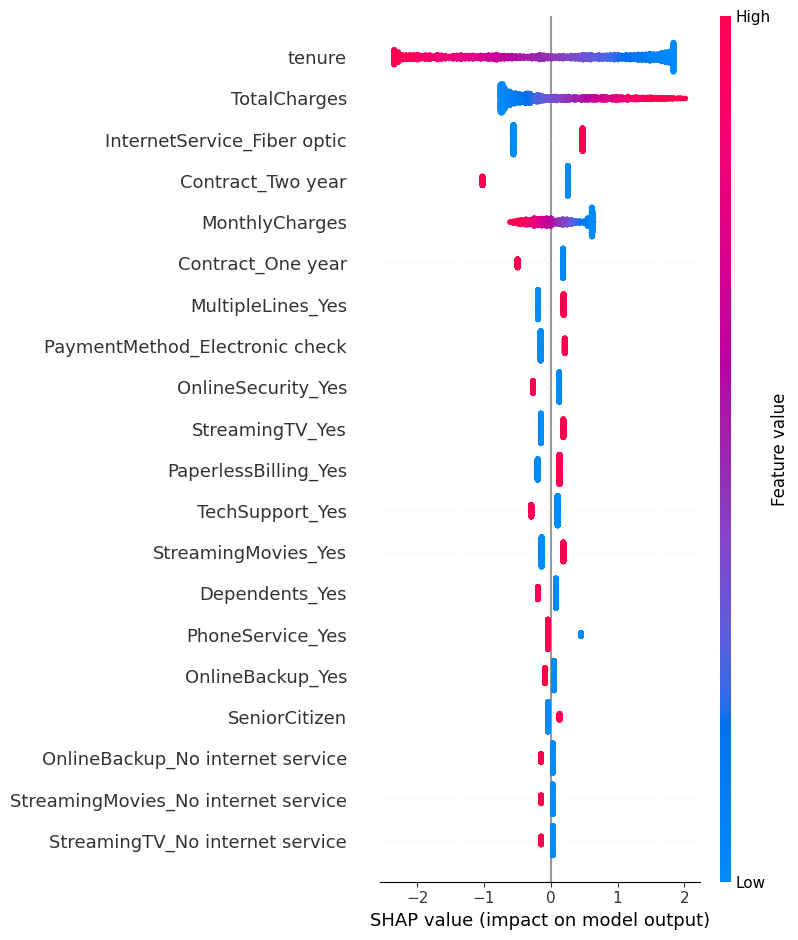

In [109]:
import shap
import numpy as np

explainer = shap.LinearExplainer(LR, X_test)
shap_values = explainer.shap_values(X_test)

# Convert shap_values and X_test to NumPy arrays with float64 dtype for plotting compatibility
shap_values_display = np.array(shap_values).astype(np.float64)
X_test_display = X_test.values.astype(np.float64)

# Use the converted data for the summary plot
shap.summary_plot(shap_values_display, X_test_display, feature_names = X_test.columns)

In [112]:
import joblib

joblib.dump(LR, "models/churn_model.joblib")
joblib.dump(scaler, "models/scaler.joblib")  # if you used a scaler


['models/scaler.joblib']

In [111]:
import os

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')